## Overview  

The below Logistic Regression Model is the submission for a DriveData Competition: Warm Up: Machine Learning with a Heart

https://www.drivendata.org/competitions/54/machine-learning-with-a-heart/page/107/

**Problem Statement**

The goal is to predict the binary class heart_disease_present, which represents whether or not a patient has heart disease:  

   * 0 represents no heart disease present  
   * 1 represents heart disease present

## Table of Contents  

* [Import Libraries](#import_libraries)
* [Import Data](#import_data)
* [Create DataFrame and Descriptive Metrics](#create_dataframe)
* [Data Preprocessing; check for nulls](#data_preprocessing)
* [Exploratory Data Analysis](#explore_data)
* [Converting Categorical Features](#convert_categorical)
* [Splitting the data into training and testing sets](#split_data)
* [Create and Train the Model](#train_model)
* [Model Evaluation](#model_eval)
* [Predictions for Competition](#comp_pred)

<a class="anchor" id="import_libraries"></a>
## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a class="anchor" id="import_data"></a>
## Import Data

In [113]:
#retrieve .csv training dataset feature attributes
train_values = pd.read_csv('train_values.csv', index_col='patient_id')

In [115]:
#retrieve .csv training dataset label attributes
train_labels = pd.read_csv('train_labels.csv', index_col='patient_id')

In [116]:
#ad training lables to training feature dataset
train_values['heart_disease_present']=train_labels['heart_disease_present']

In [117]:
train_values.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
patient_id,,,,,,,,,,,,,,
0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [118]:
df = train_values

<a class="anchor" id="create_dataframe"></a>
## Create DataFrame and Descriptive Metrics

Definitions provided with dataset:  

**slope_of_peak_exercise_st_segment** (type: int): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart  
**thal** (type: categorical): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect  
**resting_blood_pressure** (type: int): resting blood pressure  
**chest_pain_type** (type: int): chest pain type (4 values)  
**num_major_vessels** (type: int): number of major vessels (0-3) colored by flourosopy  
**fasting_blood_sugar_gt_120_mg_per_dl** (type: binary): fasting blood sugar > 120 mg/dl  
**resting_ekg_results** (type: int): resting electrocardiographic results (values 0,1,2)  
**serum_cholesterol_mg_per_dl** (type: int): serum cholestoral in mg/dl  
**oldpeak_eq_st_depression** (type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms  
**sex** (type: binary): 0: female, 1: male  
**age** (type: int): age in years  
**max_heart_rate_achieved** (type: int): maximum heart rate achieved (beats per minute)  
**exercise_induced_angina** (type: binary): exercise-induced chest pain (0: False, 1: True)

In [119]:
#verify desired columns are present; the 'target' values are missing so append target values as new column to dataset
df.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 0z64un to 2nx10r
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     180 non-null    int64  
 1   thal                                  180 non-null    object 
 2   resting_blood_pressure                180 non-null    int64  
 3   chest_pain_type                       180 non-null    int64  
 4   num_major_vessels                     180 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 6   resting_ekg_results                   180 non-null    int64  
 7   serum_cholesterol_mg_per_dl           180 non-null    int64  
 8   oldpeak_eq_st_depression              180 non-null    float64
 9   sex                                   180 non-null    int64  
 10  age                                   180 non-null    int64  
 11  max_heart_rate_a

In [121]:
df.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


<a class="anchor" id="data_preprocessing"></a>
## Data Preprocessing; check for nulls  

In [122]:
df.isnull().sum()

slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

**Missing Data**

<AxesSubplot:ylabel='patient_id'>

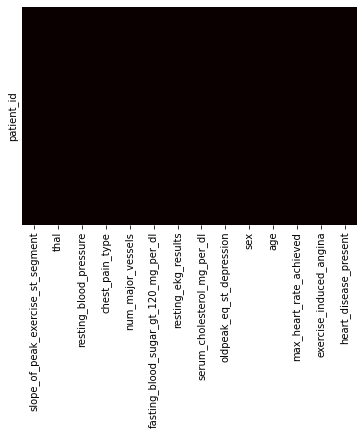

In [123]:
#we can use seaborn to create a heatmap to see where we are missing data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='hot')
#white bars represent where train.isnull() is true (missing data)

<a class="anchor" id="explore_data"></a>
## Exploratory Data Analysis

Understanding the relationship between the feature attributes and the target variable

In [36]:
#sns.pairplot(df)

<AxesSubplot:xlabel='heart_disease_present', ylabel='count'>

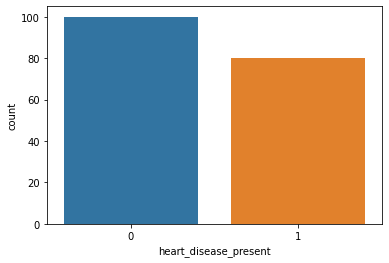

In [124]:
sns.countplot(x='heart_disease_present',data=df)

In [35]:
#omit nulls, .dropna()
#sns.displot(df['slope_of_peak_exercise_st_segment'].dropna(),kde=True,bins=30)

In [37]:
#sns.jointplot(x='Age', y='Area Income',data=ad_data)

In [38]:
#sns.jointplot(x='Age', y='Daily Time Spent on Site',data=ad_data, kind='kde',color='red')

In [39]:
#sns.pairplot(df,hue='Clicked on Ad')

In [125]:
#create a correlation matrix, round to 2 decimal places
correlation_matrix = df.corr().round(2)
correlation_matrix

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
slope_of_peak_exercise_st_segment,1.00,0.10,0.12,0.08,0.05,0.17,-0.03,0.62,0.09,0.17,-0.42,0.23,0.34
resting_blood_pressure,0.10,1.00,-0.03,0.04,0.17,0.08,0.14,0.22,-0.06,0.28,-0.02,0.12,0.08
chest_pain_type,0.12,-0.03,1.00,0.25,-0.09,0.03,0.06,0.08,0.09,0.09,-0.30,0.35,0.41
num_major_vessels,0.08,0.04,0.25,1.00,0.17,0.10,0.10,0.21,0.07,0.35,-0.28,0.15,0.42
fasting_blood_sugar_gt_120_mg_per_dl,0.05,0.17,-0.09,0.17,1.00,0.05,0.03,-0.04,0.07,0.18,0.06,-0.01,0.00
resting_ekg_results,0.17,0.08,0.03,0.10,0.05,1.00,0.17,0.10,0.05,0.13,-0.10,0.04,0.15
serum_cholesterol_mg_per_dl,-0.03,0.14,0.06,0.10,0.03,0.17,1.00,-0.02,-0.15,0.24,-0.07,0.08,0.08
oldpeak_eq_st_depression,0.62,0.22,0.08,0.21,-0.04,0.10,-0.02,1.00,0.10,0.19,-0.34,0.25,0.38
sex,0.09,-0.06,0.09,0.07,0.07,0.05,-0.15,0.10,1.00,-0.15,-0.05,0.25,0.34
age,0.17,0.28,0.09,0.35,0.18,0.13,0.24,0.19,-0.15,1.00,-0.39,0.08,0.14


<AxesSubplot:>

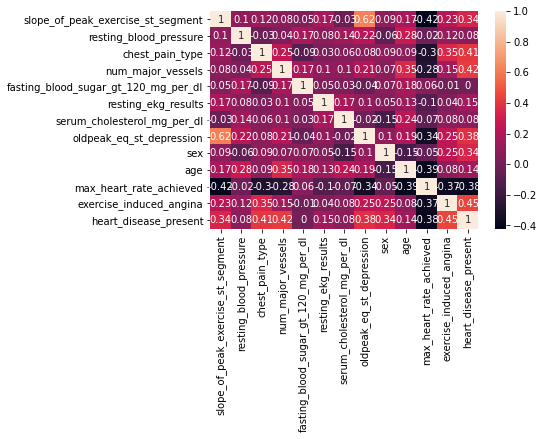

In [126]:
#plot the correlation matrix as a heat map
sns.heatmap(data=correlation_matrix,annot=True)
#sns.heatmap(data=df.corr().round(2),annot=True)

<a class="anchor" id="convert_categorical"></a>
## Converting Categorical Features
Convert categorical features to dummy variables

In [127]:
#When converting binary categorical features with pd.get_dummies, to avoid multicoliniarity need to drop column(s) before fitting model, 
THAL = pd.get_dummies(df['thal'],drop_first=True)

In [128]:
#Drop the Categorical Features from the dataset
df.drop(['thal'],axis=1,inplace=True)

In [129]:
#Add back in the dummy variable features
df = pd.concat([df,THAL],axis=1)

In [130]:
#df.head()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,normal,reversible_defect
patient_id,,,,,,,,,,,,,,,
0z64un,1,128,2,0,0,2,308,0.0,1,45,170,0,0,1,0
ryoo3j,2,110,3,0,0,0,214,1.6,0,54,158,0,0,1,0
yt1s1x,1,125,4,3,0,2,304,0.0,1,77,162,1,1,1,0
l2xjde,1,152,4,0,0,0,223,0.0,1,40,181,0,1,0,1
oyt4ek,3,178,1,0,0,2,270,4.2,1,59,145,0,0,0,1


<a class="anchor" id="split_data"></a>
## Splitting the data into training and testing sets

Create feature and label datasets;

For the feature dataset, if necessary, create a new dataset with only the feature attributes you want; using pandas or numpy 'concatenate'

In [132]:
drop_attributes = ['heart_disease_present']
X = df.drop(drop_attributes,axis=1)
y = df['heart_disease_present']

Split data into train and test sets

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
#random_state = 5, to tie out to 'towards data science' tutorial
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<a class="anchor" id="train_model"></a>
## Create and Train the Model

In [135]:
from sklearn.linear_model import LogisticRegression

In [136]:
logmodel = LogisticRegression()

In [137]:
#fit to training data
logmodel.fit(X_train,y_train)

C:\Users\Devin\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

<a class="anchor" id="model_eval"></a>
## Model Evaluation

This is the evaluation for the models classification ability, however the competition requires submission of class probability (probabilities that a patient has heart disease), not the binary/classification label.

In [138]:
#pass in data the model hasn't seen before (feature data set of our test data)
predictions = logmodel.predict(X_test)

In [139]:
from sklearn.metrics import classification_report

In [140]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.93      0.81        27
           1       0.92      0.70      0.79        33

    accuracy                           0.80        60
   macro avg       0.82      0.81      0.80        60
weighted avg       0.83      0.80      0.80        60



In [141]:
from sklearn.metrics import confusion_matrix

In [142]:
confusion_matrix(y_test, predictions)

array([[25,  2],
       [10, 23]], dtype=int64)

<a class="anchor" id="comp_pred"></a>
## Predictions for Competition



In [143]:
#pass in the competition feature test set
test_values = pd.read_csv('test_values.csv', index_col='patient_id')

Test Data Preprocessing:

**Convert Categorical features**

In [144]:
#Convert categorical test feature(s)
THAL = pd.get_dummies(test_values['thal'],drop_first=True)
test_values.drop(['thal'],axis=1,inplace=True)
test_values = pd.concat([test_values,THAL],axis=1)

**Drop features**

**Make Predictions with Test Data**

In [164]:
predic_p = logmodel.predict_proba(test_values)[:, 1]

In [166]:
predic_p

array([0.05334135, 0.19367902, 0.98107275, 0.03809837, 0.92595167,
       0.05069466, 0.03914944, 0.88715845, 0.06746388, 0.08589726,
       0.56326458, 0.41475898, 0.19965254, 0.99191316, 0.01555979,
       0.02051734, 0.03442329, 0.03196646, 0.83040086, 0.02768808,
       0.9722881 , 0.22285205, 0.03984974, 0.0032527 , 0.39880426,
       0.95380257, 0.34844266, 0.07820947, 0.59620818, 0.04049891,
       0.98368072, 0.06085767, 0.55891696, 0.5045055 , 0.0681853 ,
       0.06339825, 0.11669149, 0.27271338, 0.08307495, 0.02875374,
       0.9811356 , 0.01746603, 0.88834433, 0.02102451, 0.92193173,
       0.03598295, 0.09058161, 0.17207878, 0.1010772 , 0.88269711,
       0.90153843, 0.09021153, 0.99552044, 0.05058255, 0.10226289,
       0.01292463, 0.87395245, 0.14156233, 0.39594549, 0.6990852 ,
       0.01559208, 0.93894402, 0.14783564, 0.98185097, 0.01617556,
       0.88472633, 0.71812778, 0.41569976, 0.77372621, 0.69302086,
       0.03965107, 0.98830583, 0.94527878, 0.98165946, 0.96353

**Create Submission File**

Import the provided submission_format.csv to use as a template to create your submission file:

In [170]:
submission_format = pd.read_csv('submission_format.csv', index_col='patient_id')

In [171]:
submission_format.columns

Index(['heart_disease_present'], dtype='object')

In [172]:
my_submission = pd.DataFrame(data=predic_p,
                             columns=submission_format.columns,
                             index=submission_format.index)

In [173]:
my_submission.head()

,heart_disease_present
patient_id,
olalu7,0.053341
z9n6mx,0.193679
5k4413,0.981073
mrg7q5,0.038098
uki4do,0.925952


In [174]:
my_submission.to_csv('submission.csv')